In [1]:
pip install pandas

In [5]:
import pandas as pd
stock_data = pd.read_csv('/content/export (2).csv')

# Display the first few rows of the dataset
stock_data.head()


,stock_symbol,open_price,current_price,high_price,low_price,trading_volume,market_trend,date
0,AAPL,228.398709,227.120117,229.097952,225.481920,43556100,Downward,2024-09-24
1,AAPL,224.682796,226.121216,227.040203,223.773808,42308700,Upward,2024-09-25
2,AAPL,227.050199,227.269958,228.248877,225.162277,36636700,Upward,2024-09-26
3,AAPL,228.208935,227.539658,229.267767,227.050206,34026000,Downward,2024-09-27
4,AAPL,229.787188,232.743942,232.743942,229.397618,54541900,Upward,2024-09-30


In [6]:
# Dataset overview
stock_data.info()

# Summary statistics
stock_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stock_symbol    300 non-null    object 
 1   open_price      300 non-null    float64
 2   current_price   300 non-null    float64
 3   high_price      300 non-null    float64
 4   low_price       300 non-null    float64
 5   trading_volume  300 non-null    int64  
 6   market_trend    300 non-null    object 
 7   date            300 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 18.9+ KB


,stock_symbol,open_price,current_price,high_price,low_price,trading_volume,market_trend,date
count,300,300.000000,300.000000,300.000000,300.000000,3.000000e+02,300,300
unique,5,NaN,NaN,NaN,NaN,NaN,2,60
top,AAPL,NaN,NaN,NaN,NaN,NaN,Upward,2024-09-24
freq,60,NaN,NaN,NaN,NaN,NaN,166,5
mean,NaN,265.130518,265.662457,268.370260,262.166936,4.361389e+07,NaN,NaN
std,NaN,95.457267,95.912610,96.825275,94.379096,3.214022e+07,NaN,NaN
min,NaN,160.685833,161.305130,162.623611,159.557145,1.339640e+07,NaN,NaN
25%,NaN,188.782505,188.947506,190.705006,187.249996,2.218808e+07,NaN,NaN
50%,NaN,228.303822,228.400002,230.004997,226.334999,3.406320e+07,NaN,NaN
75%,NaN,344.107498,345.370003,350.334991,335.745003,5.079658e+07,NaN,NaN


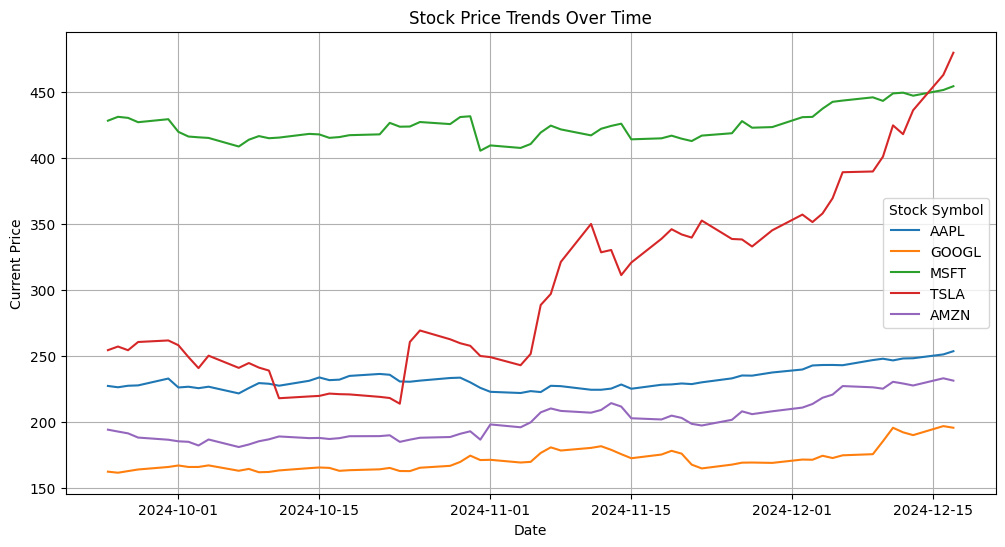

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' to datetime
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Plot trends for a specific stock symbol
plt.figure(figsize=(12, 6))
for symbol in stock_data['stock_symbol'].unique():
    symbol_data = stock_data[stock_data['stock_symbol'] == symbol]
    plt.plot(symbol_data['date'], symbol_data['current_price'], label=symbol)

plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Current Price')
plt.legend(title='Stock Symbol')
plt.grid(True)
plt.show()


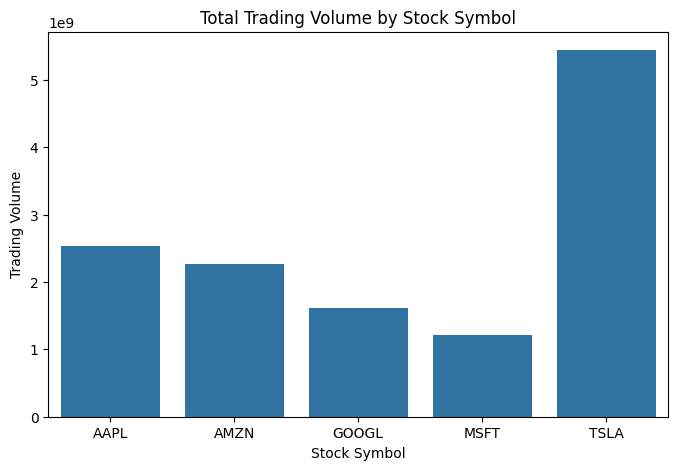

In [15]:
# Total trading volume by stock symbol
volume_by_stock = stock_data.groupby('stock_symbol')['trading_volume'].sum().reset_index()

# Bar chart for trading volumes
plt.figure(figsize=(8, 5))
sns.barplot(data=volume_by_stock, x='stock_symbol', y='trading_volume')
plt.title('Total Trading Volume by Stock Symbol')
plt.ylabel('Trading Volume')
plt.xlabel('Stock Symbol')
plt.show()


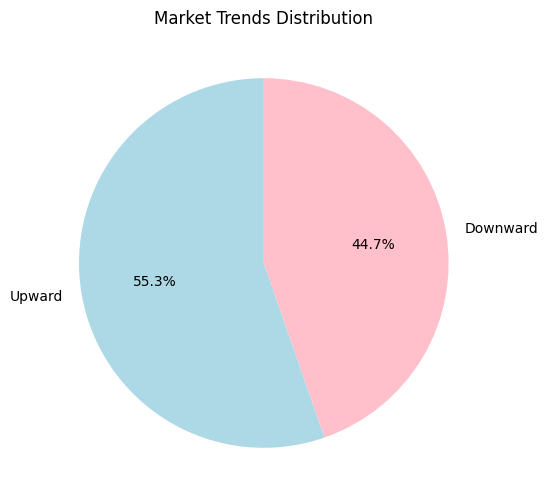

In [16]:
# Count of Upward vs Downward trends
trend_counts = stock_data['market_trend'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
trend_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Market Trends Distribution')
plt.ylabel('')
plt.show()


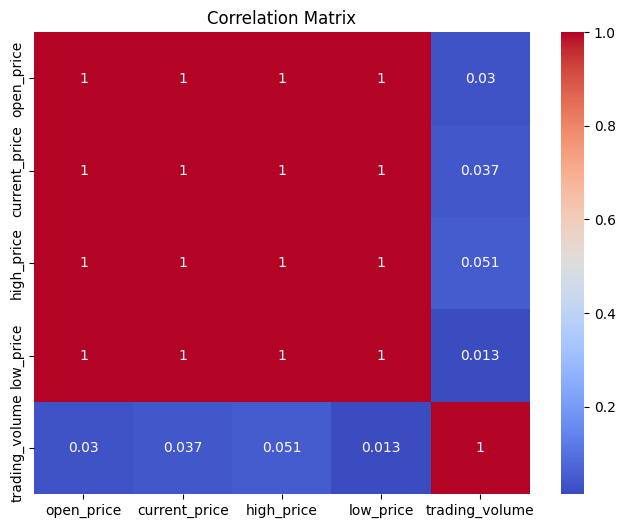

In [17]:
# Correlation heatmap
numerical_columns = ['open_price', 'current_price', 'high_price', 'low_price', 'trading_volume']
correlation_matrix = stock_data[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
